In [1]:
import numpy as np
import os
import xgboost as xgb
import matplotlib.pyplot as plt

In [148]:
data = np.load("ph++ckpt/feature/dataset_mnist_TH1_0.005_.npz")

train_feature = data['train_feature']
train_label = data['train_label']
test_feature = data['test_feature']
test_label = data['test_label']

train_feature = np.squeeze(train_feature)
test_feature = np.squeeze(test_feature)

print(train_feature.shape,train_label.shape)
print(test_feature.shape,test_label.shape)

(60000, 126) (60000,)
(10000, 126) (10000,)


In [61]:
for key in data.keys():
    print(key)

train_feature
train_label
test_feature
test_label
train_feature_1
train_feature_2


In [62]:
data['train_feature'].shape,data['train_feature_1'].shape,data['train_feature_2'].shape

((60000, 126), (100, 28, 28, 24), (100, 10, 10, 111))

In [149]:
# tr_acc = [] # change some parameters to see whether final accuracy changes
# te_acc = []
import time

t0 = time.time()

model = xgb.XGBClassifier(n_jobs=-1,
                    objective='multi:softprob',
#                     tree_method='gpu_hist', gpu_id=0,
                    max_depth=6,n_estimators=100,
                    min_child_weight=5,gamma=5,
                    subsample=0.8,learning_rate=0.1,
                    nthread=8,colsample_bytree=1.0)

model.fit(train_feature,train_label)
train_predict = model.predict(train_feature)
test_predict = model.predict(test_feature)
# clf.score(train_hop3_feats,y_test)
t1 = time.time()
print(t1-t0)

157.00614547729492


In [122]:
from sklearn.metrics import accuracy_score

print("train accuracy",accuracy_score(train_label,train_predict))
print("test accuracy",accuracy_score(test_label,test_predict))

train accuracy 0.9073666666666667
test accuracy 0.8553


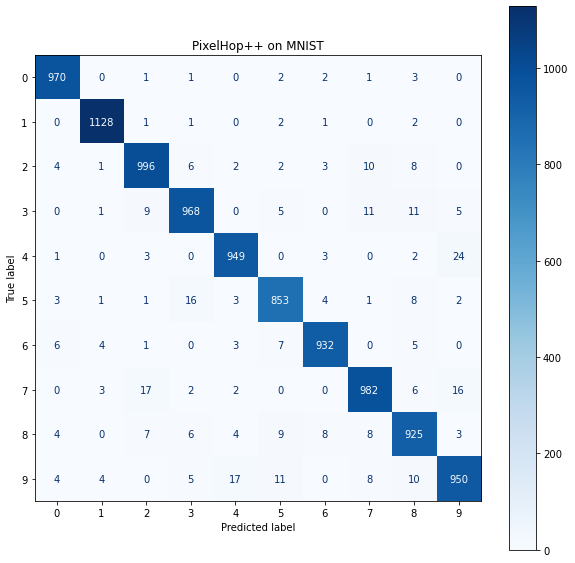

In [152]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model,test_feature,test_label,normalize =None, cmap=plt.cm.Blues, ax=ax)
# plt.show()
plt.title("PixelHop++ on MNIST")
plt.savefig('./figure/ph++_mnist_num.jpg')

In [113]:
M = confusion_matrix(test_label,test_predict,normalize='true')

In [114]:
import pandas as pd 
pd.DataFrame(M).to_csv("MNIST.csv")

In [80]:
acc = []
for i in range(10):
    acc.append(M[i,i])

In [84]:
np.argmax(acc),acc

(8, [0.832, 0.961, 0.759, 0.861, 0.788, 0.943, 0.575, 0.923, 0.966, 0.945])

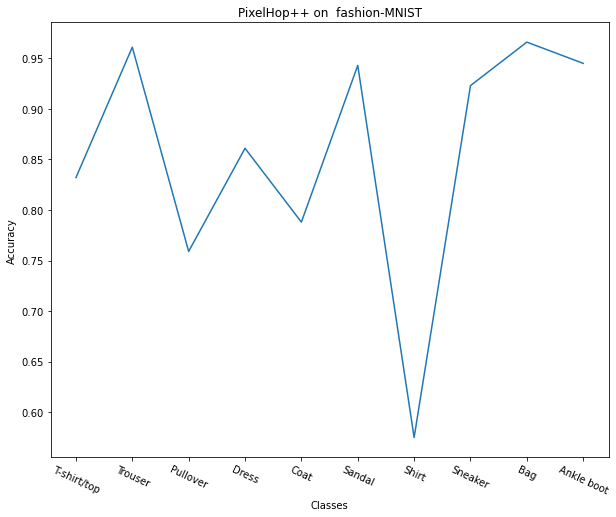

In [159]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot([i for i in range(10)],[0.832, 0.961, 0.759, 0.861, 0.788, 0.943, 0.575, 0.923, 0.966, 0.945])
plt.xticks([i for i in range(len(acc))])
plt.xlabel("Classes")
plt.ylabel("Accuracy")
plt.xticks([i for i in range(10)],label,rotation = -25)
plt.title("PixelHop++ on  fashion-MNIST")
plt.savefig("./figure/ph++fashion_mn_class.jpg")

In [125]:
label = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [14]:
test_label
test_predict
index = []
for i in range(len(test_label)):
    if(test_label[i] == 9 and test_predict[i] == 4):
        index.append(i)

In [115]:
from tensorflow.keras.datasets import mnist,cifar10,fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [19]:
x_wrong = x_test[index,:,:,:]
x_wrong = np.squeeze(x_wrong)
x_wrong.shape

(17, 28, 28)

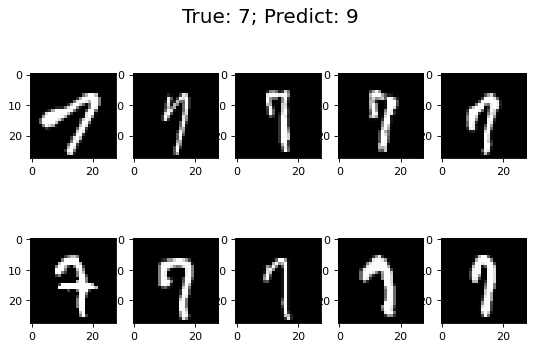

In [119]:
label = [i for i in range(10)]
index = []
true = 7
pred = 9

for i in range(len(test_label)):
    if(test_label[i] == true and test_predict[i] == pred):
        index.append(i)

x_wrong = x_test[index,:,:,:]
x_wrong = np.squeeze(x_wrong)

fig=plt.figure(figsize=(8, 5), dpi=80)
for i in range(1,11):
    ax=fig.add_subplot(2,5,i)   
    ax.imshow(x_wrong[i], cmap='gray')
    
fig.suptitle('True: {}; Predict: {}'.format(label[true],label[pred]),fontsize=18) # or plt.suptitle('Main title')
# plt.show()
fig.savefig("./figure/Mnist_T_{}_P_{}.jpg".format(label[true],label[pred]))
# fig.savefig("fashion_Mnist_T_6_P_0.jpg")

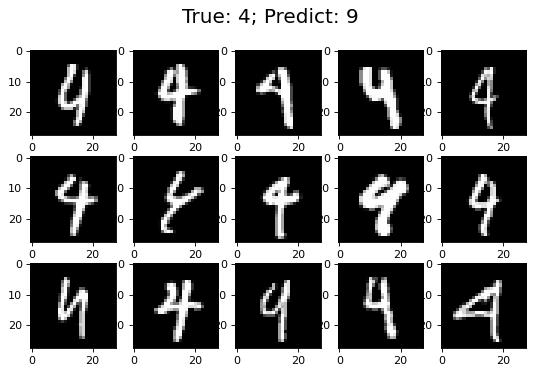

In [44]:
true = 4
pred = 9

index = []
for i in range(len(test_label)):
    if(test_label[i] == true and test_predict[i] == 9):
        index.append(i)
        
x_wrong = x_test[index,:,:,:]
x_wrong = np.squeeze(x_wrong)
x_wrong.shape

fig=plt.figure(figsize=(8, 5), dpi=80)
for i in range(1,16):
    ax=fig.add_subplot(3,5,i)   
    ax.imshow(x_wrong[i], cmap='gray')
    
fig.suptitle('True: ; Predict: 9',fontsize=18) # or plt.suptitle('Main title')
# plt.show()
fig.savefig("fashion_Mnist_T4P9.jpg")

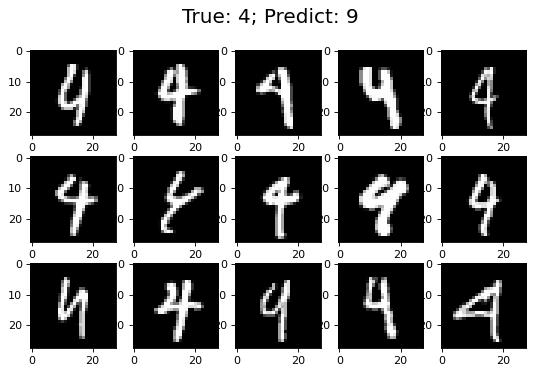

In [46]:
test_label
test_predict
index = []
for i in range(len(test_label)):
    if(test_label[i] == 4 and test_predict[i] == 9):
        index.append(i)
        
x_wrong = x_test[index,:,:,:]
x_wrong = np.squeeze(x_wrong)
x_wrong.shape

fig=plt.figure(figsize=(8, 5), dpi=80)
for i in range(1,16):
    ax=fig.add_subplot(3,5,i)   
    ax.imshow(x_wrong[i], cmap='gray')
    
fig.suptitle('True: 4; Predict: 9',fontsize=18) # or plt.suptitle('Main title')
# plt.show()
fig.savefig("Mnist_T4P9.jpg")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure()
data=np.arange(900).reshape((30,30))
for i in range(1,5):
    ax=fig.add_subplot(2,2,i)        
    ax.imshow(data)

fig.suptitle('Main title') # or plt.suptitle('Main title')
plt.show()

(array([ 4.,  4.,  0.,  5.,  0., 17., 11.,  0.,  8., 10.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

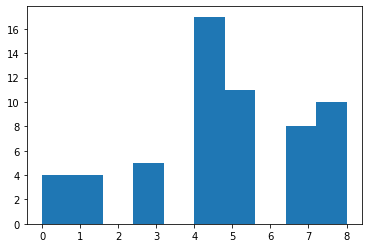

In [45]:
plt.hist(test_predict[index])

In [9]:
th = []
acc = []
with open('ph++ckpt/fashion_mnist_test_acc.txt', 'r') as f:
    data = f.readlines()
for item in data:
    th.append(float(item.split('---')[0]))
    acc.append(float(item.split('---')[1][:-2]))

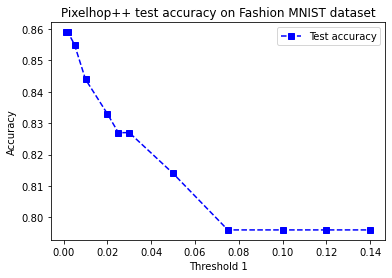

In [19]:
th = []
acc = []
with open('ph++ckpt/fashion_mnist_test_acc.txt', 'r') as f:
    data = f.readlines()
for item in data:
    th.append(float(item.split('---')[0]))
    acc.append(float(item.split('---')[1][:-2]))
    
plt.plot(th,acc, 'bs--', label = 'Test accuracy')
# plt.plot(emotion_6,'go-',label = 'Emotion 6')
# plt.plot(layers,[stack_emo[0] for _ in layers], 'k--')#, label = 'baseline accuracy')
plt.legend()
# plt.text(4, 81.07, "baseline", fontsize=16)
# plt.xticks([1,2,3,4,5])
plt.xlabel('Threshold 1')
plt.ylabel("Accuracy")
plt.title("Pixelhop++ test accuracy on Fashion MNIST dataset")
plt.savefig('./figure/ph++fashionmnist.jpg')

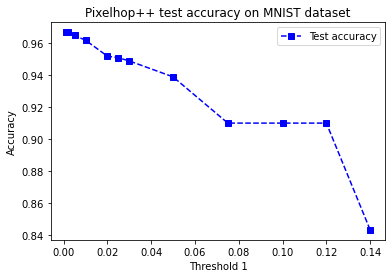

In [20]:
th = []
acc = []
with open('ph++ckpt/mnist_test_acc.txt', 'r') as f:
    data = f.readlines()
for item in data:
    th.append(float(item.split('---')[0]))
    acc.append(float(item.split('---')[1][:-2]))
    
plt.plot(th,acc, 'bs--', label = 'Test accuracy')
# plt.plot(emotion_6,'go-',label = 'Emotion 6')
# plt.plot(layers,[stack_emo[0] for _ in layers], 'k--')#, label = 'baseline accuracy')
plt.legend()
# plt.text(4, 81.07, "baseline", fontsize=16)
# plt.xticks([1,2,3,4,5])
plt.xlabel('Threshold 1')
plt.ylabel("Accuracy")
plt.title("Pixelhop++ test accuracy on MNIST dataset")
plt.savefig('./figure/ph++mnist.jpg')

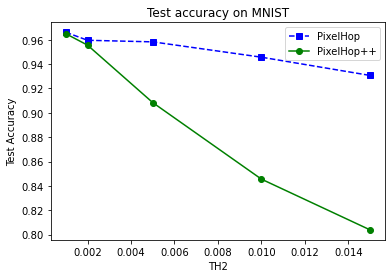

In [14]:
import matplotlib.pyplot as plt
x = [0.001,0.002,0.005,0.01,0.015]
acc_mnist = [0.9662,0.9596,0.9583,0.9457,0.9307]
acc_mnist__ =  [0.965,0.9556,0.9084,0.8455,0.8038]

plt.plot(x,acc_mnist, 'bs--', label = 'PixelHop')
plt.plot(x,acc_mnist__,'go-',label = 'PixelHop++')
# plt.plot(layers,[stack_emo[0] for _ in layers], 'k--')#, label = 'baseline accuracy')
plt.legend()
# plt.xticks(x)
plt.xlabel("TH2")
plt.ylabel("Test Accuracy")
plt.title("Test accuracy on MNIST")
plt.savefig('compare1.jpg')

In [36]:
for item in [(24, 111, 130),\
(24, 111, 130),\
(24, 111, 130),\
(24, 111, 126),\
(24, 108, 108),\
(24, 89, 58),\
(24, 89, 58),\
(24, 89, 51),\
(24, 65, 34),\
(24, 47, 22),\
(24, 47, 22),\
(24, 30, 22),\
(24, 30, 9)

SyntaxError: unexpected EOF while parsing (<ipython-input-36-b23928848c4f>, line 13)

In [45]:
()

TypeError: 'int' object is not iterable

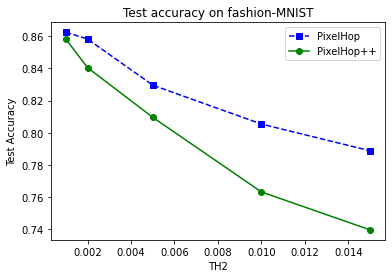

In [13]:
x = [0.001,0.002,0.005,0.01,0.015]
acc_fmnist = [0.8625,0.8583,0.8296,0.8054,0.7888]
acc_fmnist__ =  [0.8583,0.8405,0.8096,0.7632,0.7396]

plt.plot(x,acc_fmnist, 'bs--', label = 'PixelHop')
plt.plot(x,acc_fmnist__,'go-',label = 'PixelHop++')
# plt.plot(layers,[stack_emo[0] for _ in layers], 'k--')#, label = 'baseline accuracy')
plt.legend()
plt.xlabel("TH2")
plt.ylabel("Test Accuracy")
plt.title("Test accuracy on fashion-MNIST")
plt.savefig('compare2.jpg')